<a href="https://colab.research.google.com/github/souravs17031999/Projects-kaggle-problems-60daysofudacity/blob/master/blood_cancer_detection_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project : Blood Cancer Detection 
# Dataset : from kaggle
# Framework : PyTorch

In [0]:
# packages import

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/lymphocyte/lymphoma/CLL/sj-03-2810_006.tif
/kaggle/input/lymphocyte/lymphoma/CLL/sj-03-5521_008.tif
/kaggle/input/lymphocyte/lymphoma/CLL/sj-05-5269-R10_003.tif
/kaggle/input/lymphocyte/lymphoma/CLL/sj-03-852-R2_004.tif
/kaggle/input/lymphocyte/lymphoma/CLL/sj-03-476_009.tif
/kaggle/input/lymphocyte/lymphoma/CLL/sj-03-2810_008.tif
/kaggle/input/lymphocyte/lymphoma/CLL/sj-05-3344_010.tif
/kaggle/input/lymphocyte/lymphoma/CLL/sj-05-3165_004.tif
/kaggle/input/lymphocyte/lymphoma/CLL/sj-03-4957_007.tif
/kaggle/input/lymphocyte/lymphoma/CLL/sj-03-476_002.tif
/kaggle/input/lymphocyte/lymphoma/CLL/sj-05-5269-R10_015.tif
/kaggle/input/lymphocyte/lymphoma/CLL/sj-03-476_010.tif
/kaggle/input/lymphocyte/lymphoma/CLL/sj-03-852-R2_013.tif
/kaggle/input/lymphocyte/lymphoma/CLL/sj-03-476_008.tif
/kaggle/input/lymphocyte/lymphoma/CLL/sj-05-3874-R2_007.tif
/kaggle/input/lymphocyte/lymphoma/CLL/sj-05-3344_011.tif
/kaggle/input/lymphocyte/lymphoma/CLL/sj-03-476_005.tif
/kaggle/input/lymphoc

In [0]:
!pwd

/kaggle/working


In [0]:
# Imports here
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
from torch.utils import data
import torch
from torch import nn
from torch import optim
import torchvision
import torch.nn.functional as F
from torchvision import datasets, transforms, models
import torchvision.models as models
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset, DataLoader
from skimage import io, transform
import torch.utils.data as data_utils
from PIL import Image, ImageFile
import json
from torch.optim import lr_scheduler
import time
import os
import argparse
import copy
import pandas as pd
ImageFile.LOAD_TRUNCATED_IMAGES = True

### Constructing folders for dataset loader

In [0]:
train_dir = '../input/lymphocyte/lymphoma'
train_transforms = transforms.Compose([transforms.RandomResizedCrop(224),transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])
train_data = datasets.ImageFolder(train_dir , transform=train_transforms)


In [0]:
train_data

Dataset ImageFolder
    Number of datapoints: 374
    Root location: ../input/lymphocyte/lymphoma
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

### splitting into training and validation 

In [0]:
valid_size = 0.2
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

In [0]:
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

### Loading dataset

In [0]:
trainloader = torch.utils.data.DataLoader(train_data, batch_size=64,sampler=train_sampler)
validloader = torch.utils.data.DataLoader(train_data, batch_size=64, sampler=valid_sampler)

In [0]:
print(f"training examples contain : {len(train_data)}")

print(len(trainloader))
print(len(validloader))


training examples contain : 374
5
2


In [0]:
images, labels = next(iter(trainloader))


### Visualizing dataset

Image shape : torch.Size([64, 3, 224, 224])
Label shape : torch.Size([64])
labels: tensor([0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 0,
        1, 1, 2, 0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 0, 0, 1, 2, 0,
        2, 1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 0, 2, 2, 1])


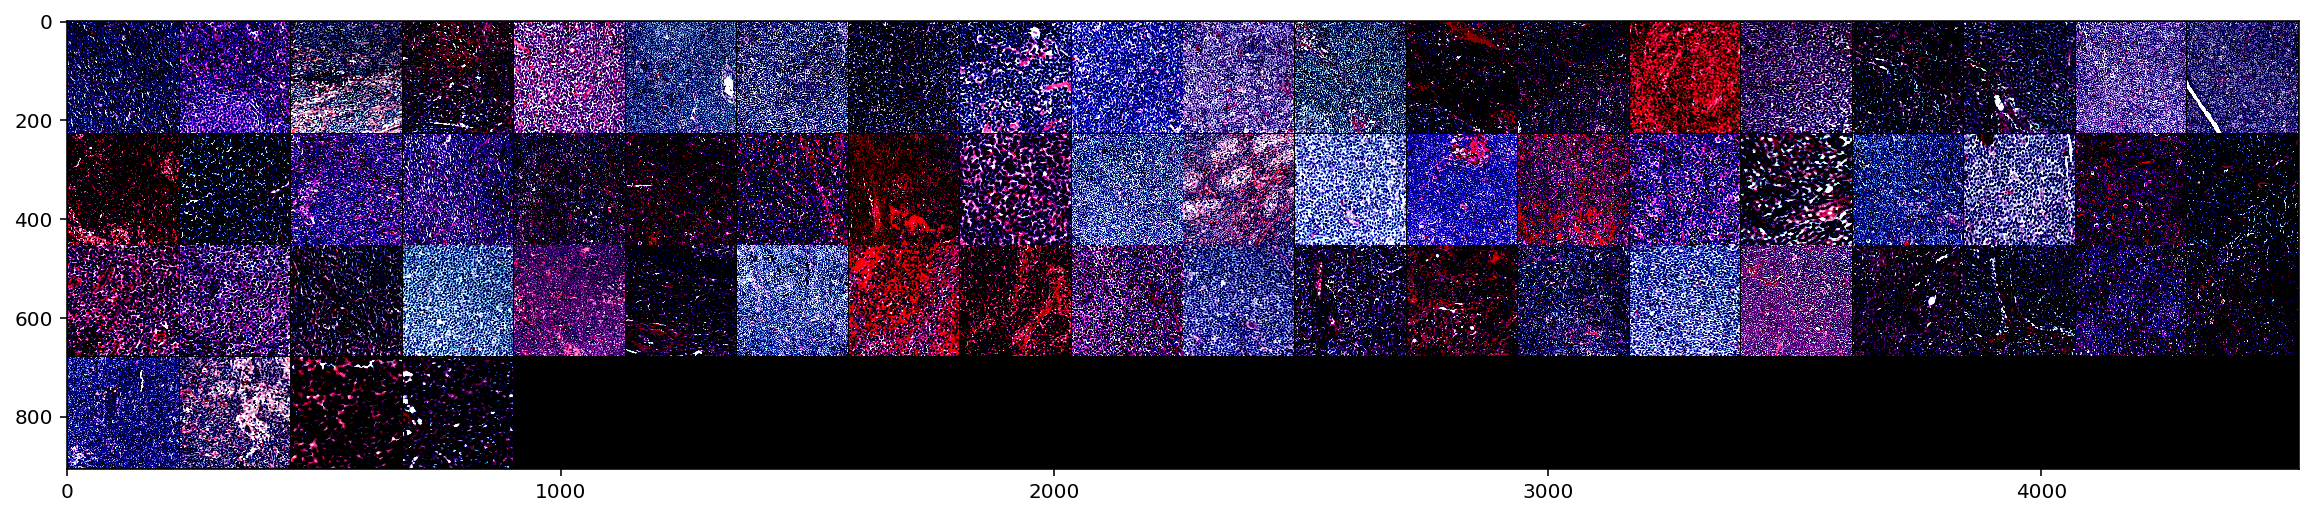

In [0]:
# LOAD ONE BATCH OF TESTING SET TO CHECK THE IMAGES AND THEIR LABELS
images, labels = next(iter(trainloader))

# Checking shape of image
print(f"Image shape : {images.shape}")
print(f"Label shape : {labels.shape}")

class_names = train_data.classes

# denormalizing images
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

# plotting the images of loaded batch with given fig size and frame data    
import torchvision
import matplotlib.pyplot as plt
import numpy as np
grid = torchvision.utils.make_grid(images, nrow = 20, padding = 2)
plt.figure(figsize = (20, 20))  
plt.imshow(np.transpose(grid, (1, 2, 0)))   
print('labels:', labels)    


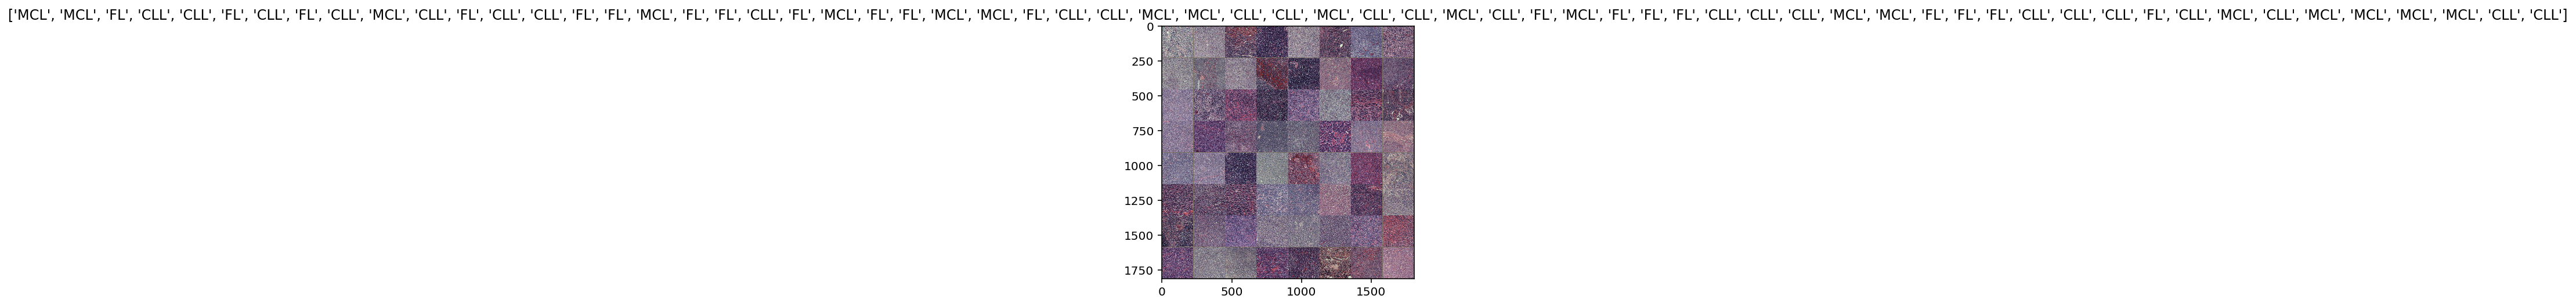

In [0]:
# Printing normalized images
images, labels = next(iter(trainloader))
out = torchvision.utils.make_grid(images)
imshow(out, title=[class_names[x] for x in labels])

### checking if gpu is active 

In [0]:

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [0]:
model_save_name = 'classifier.pt'
path = F"/kaggle/working/{model_save_name}"

### model definition 

In [0]:

# defining device 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# downloading model
model = models.resnet152(pretrained=True)  # if used inception , then use image size 299*299 otherwise 224*224 and use : model_ft.aux_logits=False to switch off auxiliary lyers
# setting firstly classifier only for training 
for param in model.parameters():
  param.requires_grad = False
  
# set inputs and output classes
num_ftrs = model.fc.in_features # todo : change accordingly
out_ftrs = 3 # todo : change accordingly
  
model.fc = nn.Sequential(nn.Linear(num_ftrs, 512),nn.ReLU(),nn.Linear(512,out_ftrs),nn.LogSoftmax(dim=1))
# defining the loss function 
criterion = nn.NLLLoss()
  
# defining the optimizer and scheduler
optimizer = torch.optim.Adam(filter(lambda p:p.requires_grad,model.fc.parameters()) , lr = 0.001) # todo : change accordingly
#scheduler = lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.1)

# sending the model to device - GPU OR CPU
model.to(device);

In [0]:
model

### Training and validation loop

In [0]:
def train_and_test(e):
    epochs = e
    train_losses , test_losses = [] , []
    valid_loss_min = np.Inf 
    model.train()
    for epoch in range(epochs):
      running_loss = 0
      batch = 0
      #scheduler.step()
      for images , labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        batch += 1
        print(f" epoch {epoch + 1} batch {batch} completed") # todo : change accordingly
      test_loss = 0
      accuracy = 0
      with torch.no_grad():
        model.eval() 
        for images , labels in validloader:
          images, labels = images.to(device), labels.to(device)
          logps = model(images) 
          test_loss += criterion(logps,labels) 
          ps = torch.exp(logps)
          top_p , top_class = ps.topk(1,dim=1)
          equals = top_class == labels.view(*top_class.shape)
          accuracy += torch.mean(equals.type(torch.FloatTensor))
      train_losses.append(running_loss/len(trainloader))
      test_losses.append(test_loss/len(validloader))
      print("Epoch: {}/{}.. ".format(epoch+1, epochs),"Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),"Valid Loss: {:.3f}.. ".format(test_loss/len(validloader)),
        "Valid Accuracy: {:.3f}".format(accuracy/len(validloader)))
      model.train() 
      if test_loss/len(validloader) <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,test_loss/len(validloader))) 
        torch.save({
            'epoch': epoch,
            'model': model,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': valid_loss_min
            }, path)
        valid_loss_min = test_loss/len(validloader) 
    return train_losses, test_losses
        

In [0]:
train_losses, test_losses = train_and_test(50)

 epoch 1 batch 1 completed
 epoch 1 batch 2 completed
 epoch 1 batch 3 completed
 epoch 1 batch 4 completed
 epoch 1 batch 5 completed
Epoch: 1/50..  Training Loss: 1.427..  Valid Loss: 1.104..  Valid Accuracy: 0.333
Validation loss decreased (inf --> 1.104348).  Saving model ...
 epoch 2 batch 1 completed
 epoch 2 batch 2 completed
 epoch 2 batch 3 completed
 epoch 2 batch 4 completed
 epoch 2 batch 5 completed
Epoch: 2/50..  Training Loss: 1.049..  Valid Loss: 1.003..  Valid Accuracy: 0.466
Validation loss decreased (1.104348 --> 1.002622).  Saving model ...
 epoch 3 batch 1 completed
 epoch 3 batch 2 completed
 epoch 3 batch 3 completed
 epoch 3 batch 4 completed
 epoch 3 batch 5 completed
Epoch: 3/50..  Training Loss: 0.836..  Valid Loss: 1.112..  Valid Accuracy: 0.444
 epoch 4 batch 1 completed
 epoch 4 batch 2 completed
 epoch 4 batch 3 completed
 epoch 4 batch 4 completed
 epoch 4 batch 5 completed
Epoch: 4/50..  Training Loss: 0.871..  Valid Loss: 0.791..  Valid Accuracy: 0.694

Epoch: 34/50..  Training Loss: 0.343..  Valid Loss: 0.465..  Valid Accuracy: 0.864
 epoch 35 batch 1 completed
 epoch 35 batch 2 completed
 epoch 35 batch 3 completed
 epoch 35 batch 4 completed
 epoch 35 batch 5 completed
Epoch: 35/50..  Training Loss: 0.413..  Valid Loss: 1.026..  Valid Accuracy: 0.633
 epoch 36 batch 1 completed
 epoch 36 batch 2 completed
 epoch 36 batch 3 completed
 epoch 36 batch 4 completed
 epoch 36 batch 5 completed
Epoch: 36/50..  Training Loss: 0.342..  Valid Loss: 0.372..  Valid Accuracy: 0.830
Validation loss decreased (0.376278 --> 0.372325).  Saving model ...
 epoch 37 batch 1 completed
 epoch 37 batch 2 completed
 epoch 37 batch 3 completed
 epoch 37 batch 4 completed
 epoch 37 batch 5 completed
Epoch: 37/50..  Training Loss: 0.307..  Valid Loss: 0.417..  Valid Accuracy: 0.837
 epoch 38 batch 1 completed
 epoch 38 batch 2 completed
 epoch 38 batch 3 completed
 epoch 38 batch 4 completed
 epoch 38 batch 5 completed
Epoch: 38/50..  Training Loss: 0.302.. 

#### Best accuracy is acheived at epoch 50 of around 91.4 % with validation loss as around 0.296

### model complexity graph

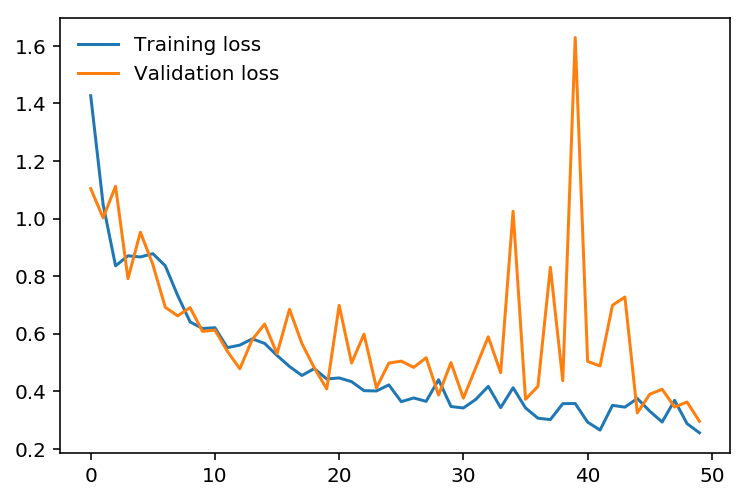

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)